In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import pickle
# Load the car dataset





In [2]:
car=pd.read_csv('D:\\machine learning\\car data.csv')
backup=car.copy()

In [3]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [4]:
car=car[car['Price']!='Ask For Price']

In [5]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [6]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [7]:
car=car[car['year'].str.isnumeric()]

In [8]:
car['year']=car['year'].astype(int)

In [9]:
car=car[~car['fuel_type'].isna()]

In [10]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [11]:
car=car.reset_index(drop=True)

In [12]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [13]:
car.to_csv('Cleaned_Car_data.csv')

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 32.0+ KB


In [15]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816,816
unique,254,25,NaN,NaN,248,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,45000,Petrol
freq,51,221,NaN,NaN,30,428
mean,NaN,NaN,2012.444853,4.117176e+05,NaN,NaN
std,NaN,NaN,4.002992,4.751844e+05,NaN,NaN
min,NaN,NaN,1995.000000,3.000000e+04,NaN,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,NaN,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,NaN,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,NaN,NaN


In [16]:
car=car[car['Price']<6000000]

In [17]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

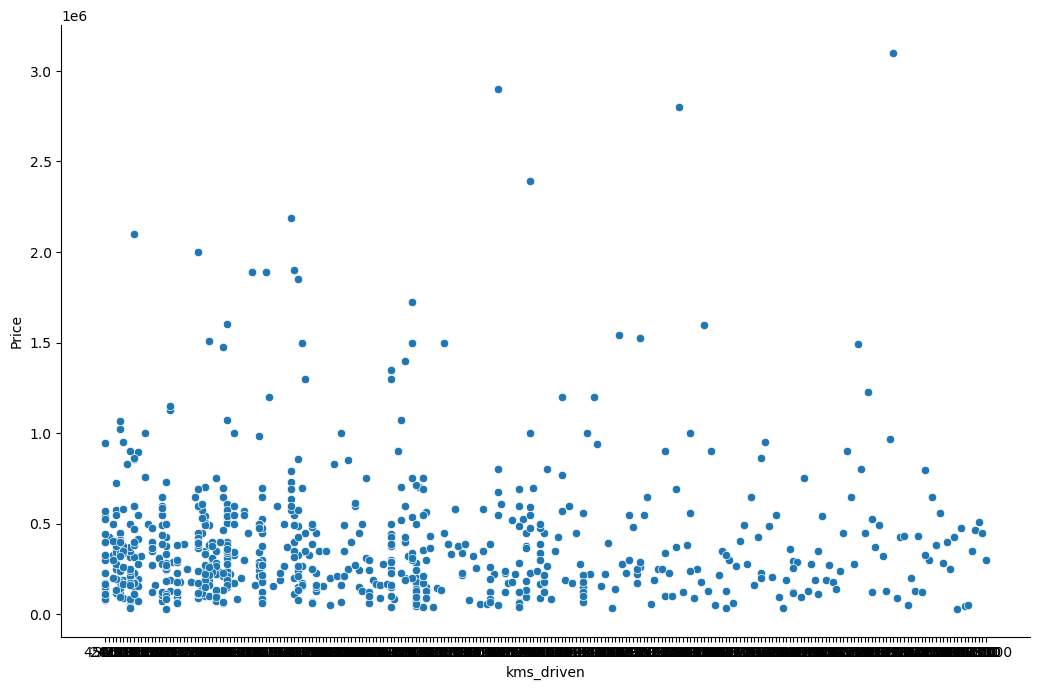

In [18]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

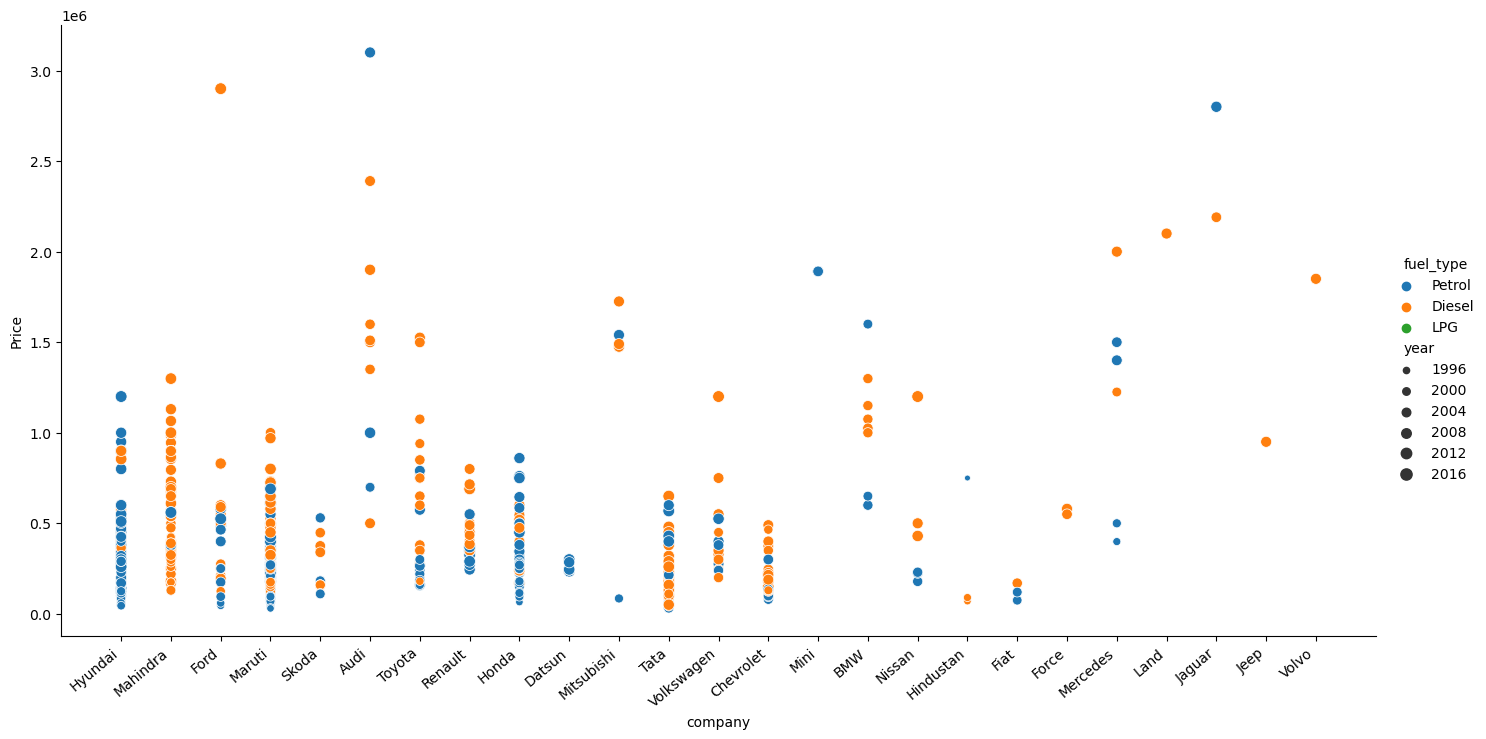

In [19]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [20]:
X = car[['name', 'company', 'year', 'kms_driven', 'fuel_type']]
y = car['Price']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:

ohe = OneHotEncoder(handle_unknown='ignore')  # Set handle_unknown to 'ignore'
ohe.fit(X[['name', 'company', 'fuel_type']])


OneHotEncoder(handle_unknown='ignore')

In [23]:
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), ['name', 'company', 'fuel_type']),
    remainder='passthrough'
)

In [24]:
# Linear Regression Model
lr = LinearRegression()



In [25]:
# Making a pipeline
pipe = make_pipeline(column_trans, lr)



In [26]:
# Fitting the model
pipe.fit(X_train, y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [27]:
# Check R2 Score
y_pred_train = pipe.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"R2 Score on Training Data: {r2_train}")


R2 Score on Training Data: 0.7856492218853252


In [28]:

# Save the model
pickle.dump(pipe, open('LinearRegressionModel.pkl', 'wb'))


In [29]:
import tkinter as tk
from tkinter import messagebox

# Creating a Tkinter GUI for predictions
def predict_price(name, company, year, kms_driven, fuel_type):
    try:
        input_data = pd.DataFrame(
            columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'],
            data=np.array([name, company, int(year), int(kms_driven), fuel_type]).reshape(1, 5)
        )
        prediction = pipe.predict(input_data)[0]
        return prediction
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

def predict_button_clicked():
    name = entry_name.get()
    company = entry_company.get()
    year = entry_year.get()
    kms_driven = entry_kms.get()
    fuel_type = entry_fuel.get()
    prediction = predict_price(name, company, year, kms_driven, fuel_type)
    if prediction is not None:
        result_label.config(text=f"Predicted Price: {prediction:.2f} INR")

# Tkinter GUI
root = tk.Tk()
root.title("Car Price Prediction")

# Create and place entry widgets
entry_name = tk.Entry(root, width=30)
entry_name.grid(row=0, column=1, padx=10, pady=5)
tk.Label(root, text="Car Name:").grid(row=0, column=0, padx=10, pady=5)

entry_company = tk.Entry(root, width=30)
entry_company.grid(row=1, column=1, padx=10, pady=5)
tk.Label(root, text="Company:").grid(row=1, column=0, padx=10, pady=5)

entry_year = tk.Entry(root, width=30)
entry_year.grid(row=2, column=1, padx=10, pady=5)
tk.Label(root, text="Year:").grid(row=2, column=0, padx=10, pady=5)

entry_kms = tk.Entry(root, width=30)
entry_kms.grid(row=3, column=1, padx=10, pady=5)
tk.Label(root, text="Kms Driven:").grid(row=3, column=0, padx=10, pady=5)

entry_fuel = tk.Entry(root, width=30)
entry_fuel.grid(row=4, column=1, padx=10, pady=5)
tk.Label(root, text="Fuel Type:").grid(row=4, column=0, padx=10, pady=5)

# Create predict button
predict_button = tk.Button(root, text="Predict Price", command=predict_button_clicked)
predict_button.grid(row=5, column=0, columnspan=2, pady=10)

# Create result label
result_label = tk.Label(root, text="")
result_label.grid(row=6, column=0, columnspan=2, pady=10)

# Run the Tkinter event loop
root.mainloop()
